### 文件

多种读取文件的方式

In [1]:
# 方法1
f = open('test.txt', 'r')
print(f.read())
f.close()

life is short, I use Python.
Machine Learning
Computer Vision


In [2]:
# 方法2
with open('test.txt', 'r') as fr:
    print(fr.read())

life is short, I use Python.
Machine Learning
Computer Vision


In [3]:
# 读取文件也可以采用 for-in 循环逐行读取
with open('test.txt', 'r') as fr:
    for line in fr:
        print(line.strip())

life is short, I use Python.
Machine Learning
Computer Vision


#### 读取中文名字和有中文内容的文件

创建一个新的 txt 文件，命名包含中文名字，内容也包含中文名字

In [4]:
fname = '编程.txt'
with open(fname, 'r', encoding='utf-8') as fr:
    for line in fr:
        print(line.strip())

python 很好用
c++ 速度快


In [ ]:
# 对于带有中文名字的文件读取，如果上述代码读取失败，可以考虑下面的代码，对文件名字进行编码
with open(fname.encode('utf-8'), 'r', encoding='utf-8') as fr:
    for line in fr:
        print(line.strip())

### 加入异常处理
加入异常处理的读写文件操作，代码更加健壮

In [49]:
def read_file(file_name):
    file_contents = None
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            file_contents = f.read()
    except FileNotFoundError:
        print('无法打开指定的文件!')
    except LookupError:
        print('指定了未知的编码!')
    except UnicodeDecodeError:
        print('读取文件时解码错误!')
    else:
        print('读取文件成功')
    finally:
        print('程序执行完毕')
        
    return file_contents

In [60]:
import sys
def read_file2(file_name):
    file_contents = None
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            file_contents = f.read()
    except (LookupError, UnicodeDecodeError) as e:
        print(e)
    except:
        print('发生了未知的错误', sys.exc_info()[0])
    else:
        print('读取文件成功')
    finally:
        print('程序执行完毕')
        
    return file_contents

In [63]:
import sys
def read_file3(file_name):
    file_contents = None
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            file_contents = f.read()
    except Exception as e:
        print(e)
    else:
        print('读取文件成功')
    finally:
        print('程序执行完毕')
        
    return file_contents

In [65]:
# 抛出异常
def read_file4(file_name):
    file_contents = None
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            file_contents = f.read()
    except Exception as e:
        print(e)
        raise
    else:
        print('读取文件成功')
    finally:
        print('程序执行完毕')
        
    return file_contents

In [50]:
fname = '编程.txt'
print(read_file(fname))

读取文件成功
程序执行完毕
python 很好用
c++ 速度快


In [62]:
f1 = 'n1.txt'
print(read_file2(f1))

[Errno 2] No such file or directory: 'n1.txt'
程序执行完毕
None


In [64]:
f1 = 'n1.txt'
print(read_file3(f1))

[Errno 2] No such file or directory: 'n1.txt'
程序执行完毕
None


In [66]:
f1 = 'n1.txt'
print(read_file4(f1))

[Errno 2] No such file or directory: 'n1.txt'
程序执行完毕


FileNotFoundError: [Errno 2] No such file or directory: 'n1.txt'

In [51]:
fname2 = 'test.txt'
print(read_file(fname2))

读取文件成功
程序执行完毕
life is short, I use Python.
Machine Learning
Computer Vision


In [52]:
# 读取不存在的文件
fname3 = 'ac.txt'
print(read_file(fname3))

无法打开指定的文件!
程序执行完毕
None


### 写入文件

In [53]:
def save_to_file(input_file, outputfile, write_mode='w'):
    file_contents = read_file(input_file)
    try:
        with open(outputfile, write_mode, encoding='utf-8') as fw:
            fw.write(file_contents)
    except IOError as ioerror:
        print(ioerror)
        print('写入文件出错')
        

In [54]:
input_file = 'test.txt'
output_file= 'new_test.txt'
save_to_file(input_file, output_file, write_mode='w')

读取文件成功
程序执行完毕


In [55]:
print(read_file(output_file))

读取文件成功
程序执行完毕
life is short, I use Python.
Machine Learning
Computer Vision


In [56]:
input_file = '编程.txt'
save_to_file(input_file, output_file, 'a')

读取文件成功
程序执行完毕


In [57]:
print(read_file(output_file))

读取文件成功
程序执行完毕
life is short, I use Python.
Machine Learning
Computer Visionpython 很好用
c++ 速度快


### 读写二进制文件

接下来开始读取二进制文件，下面代码实现复制图片文件的功能

In [58]:
def copy_image_file(input_image, output_image):
    try:
        with open(input_image, 'rb') as img1:
            data = img1.read()
            print(type(data))
        with open(output_image, 'wb') as out:
            out.write(data)
    except FileNotFoundError as e:
        print('指定的文件无法打开--{}'.format(input_image))
    except IOError as e:
        print('读写文件出现错误')
    finally:
        print('程序执行结束')

In [59]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
input_image = 'example.jpg'
output_image = 'copyed.jpg'

(600, 896, 3)


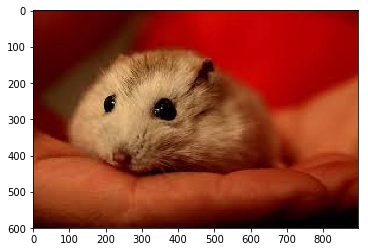

In [69]:
%matplotlib inline
img = Image.open(input_image)
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img)

(600, 896, 3)


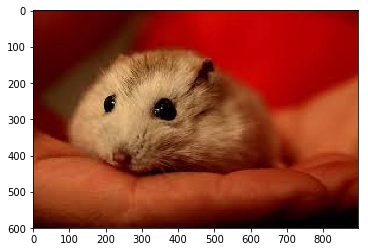

In [70]:
%matplotlib inline
img = Image.open(input_image)
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img);

In [35]:
copy_image_file(input_image, output_image)

<class 'bytes'>
程序执行结束


(600, 896, 3)


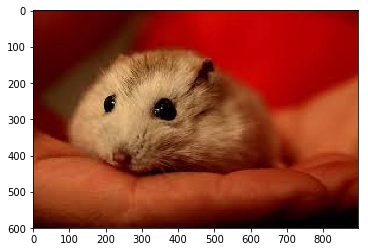

In [36]:
img = Image.open(output_image)
print(np.asarray(img, dtype=np.uint8).shape)
plt.imshow(img);

### json文件的读写

In [37]:
import json

In [38]:
# 先生成一个json文件
test_dict = {
    'name': 'python',
    'age': 40,
    'package': ['os', 'json', 'sys'],
    'features': {
        'data_analysis': ['pandas', 'matplotlib'],
        'deep_learning': ['scikit-learn', 'tensorflow', 'pytorch', 'keras']
    }
}
try:
    with open('test_data.json', 'w', encoding='utf-8') as fw:
        json.dump(test_dict, fw, indent=4, separators=(',', ': '))
except IOError as e:
    print(e)
finally:
    print('程序执行完毕')

程序执行完毕


In [39]:
# 读取 json 文件
try:
    with open('test_data.json', 'r') as fr:
        contents = json.load(fr)
        for key, val in contents.items():
            print('{}: {}'.format(key, val))
except IOError as e:
    print(e)
print('读取完毕')

age: 40
features: {'deep_learning': ['scikit-learn', 'tensorflow', 'pytorch', 'keras'], 'data_analysis': ['pandas', 'matplotlib']}
package: ['os', 'json', 'sys']
name: python
读取完毕


### pathlib 模块介绍

In [74]:
import pathlib
import os

In [75]:
data_folder = 'source_folder/python/'
file_path = os.path.join(data_folder, 'abc.txt')
print(file_path)

source_folder/python/abc.txt


In [79]:
from pathlib import Path
data_folder = Path('source_folder/python/')
file_path = data_folder / 'abc.txt'
print(file_path)

source_folder\python\abc.txt


In [82]:
data_folder = Path('./')
file_path = data_folder / 'test.txt'
print(file_path.read_text())

life is short, I use Python.
Machine Learning
Computer Vision


In [83]:
filename = Path('./test.txt')
print(filename.name)
print(filename.suffix)
print(filename.stem)
if not filename.exists():
    print('file does not exist!')
else:
    print('file exists')

test.txt
.txt
test
file exists


In [85]:
from pathlib import PureWindowsPath
filename = Path('source/test.txt')
path_on_windows = PureWindowsPath(filename)
print(path_on_windows)

source\test.txt


In [86]:
# 显式定义文件路径的格式
filename = PureWindowsPath('source/test.txt')
correct_path = Path(filename)
print(correct_path)

source\test.txt


In [87]:
import webbrowser
filename = Path('./test.txt')
webbrowser.open(filename.absolute().as_uri())

True